

## Network Science Assignment 6 (HS22)

David Diener 19-733-179

Rafael Dubach 18-755-180

In [ ]:
#https://github.com/nicoloval/NEMtropy 

In [ ]:
pip install NEMtropy

In [3]:
import math as m
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt 
from typing import Tuple, List, Dict
from networkx.algorithms.community import modularity
from networkx.algorithms.community import girvan_newman
from networkx.algorithms.smallworld import random_reference
from networkx.algorithms.link_analysis.pagerank_alg import pagerank
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community.label_propagation import label_propagation_communities
from networkx.generators.random_graphs import gnm_random_graph
from networkx.generators.random_graphs import erdos_renyi_graph
from networkx.generators.random_graphs import binomial_graph
from networkx.algorithms.cluster import average_clustering
from networkx import is_connected, connected_components, watts_strogatz_graph,average_shortest_path_length
from scipy.special import factorial
from scipy.stats import poisson, expon
from networkx.algorithms.assortativity import degree_pearson_correlation_coefficient
from networkx.generators.random_graphs import barabasi_albert_graph
from networkx.algorithms import diameter
from networkx import degree_assortativity_coefficient
from NEMtropy import UndirectedGraph, DirectedGraph
from NEMtropy.network_functions import build_adjacency_from_edgelist
import warnings
from NEMtropy import matrix_generator


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
graphs = {}

for i in range(1992, 2003):
  graphs[i] = nx.read_graphml(f"/content/drive/MyDrive/Colab Notebooks/Exercise_6/WDN_{i}.txt.graphml")

years = [k for k in graphs.keys()]


# A06.1 - Exponential Random Graph Models
Task: For the World Trade Web dataset, fit different ERGM-based Configuration Models and compare basic network metrics with null models

For each of the WTW networks provided:
+ measure the average clustering and reciprocity coefficients
+ fit the Undirected Binary CM and Directed Binary CM
+ sample 30 networks from the obtained distributions and
measure clustering and reciprocity (for the Directed ones).
+ Calculate average and standard error on both
+ plot clustering and reciprocity as functions of time, comparing
the real value with the average and error bars from samples

In [7]:
orig_clust, orig_rec = [], []
orig_clust_undir = []

for k,v in graphs.items():

    c, r, std = [], [], []
    g = v
    orig_clust.append(nx.average_clustering(g))

# directed
    adj_g = nx.to_numpy_array(g)
    dg = DirectedGraph(adj_g)
    dg.solve_tool(model="dcm_exp", max_steps=10000)
    dg.ensemble_sampler(30, cpu_n=1, output_dir=f"samples/{k}/directed/") #30

# undirected
    ug_bin = g.to_undirected()
    adj_undir = nx.to_numpy_array(ug_bin)
    ug = UndirectedGraph(adj_undir)
    orig_rec.append(nx.overall_reciprocity(g))             #ka öb das stimmt orig_rec wer sust leer
    ug.solve_tool(model="cm_exp", max_steps=10000)     
    ug.ensemble_sampler(30, cpu_n=1, output_dir=f"samples/{k}/undirected/") #30





solution error = 1.7711272448650561e-09


/usr/local/lib/python3.7/dist-packages/numba/core/utils.py:613: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  category=NumbaExperimentalFeatureWarning)



solution error = 5.749797082899022e-09

solution error = 2.7650486345009995e-09

solution error = 4.451294444152154e-09

solution error = 3.2683935557997756e-09

solution error = 3.1791103083378403e-09

solution error = 2.5190303176714224e-09

solution error = 2.6498128136154264e-09

solution error = 3.0723299460078124e-09

solution error = 3.759538458325551e-09

solution error = 2.0059189864696236e-09

solution error = 1.2938983218191424e-09

solution error = 2.7865496576851e-09

solution error = 2.1848052256245865e-09

solution error = 3.101632728430559e-09

solution error = 9.120242339122342e-10

solution error = 2.32873986760751e-09

solution error = 2.258786935271928e-09

solution error = 2.3008084326647804e-09

solution error = 9.157304248219589e-09

solution error = 2.8686883979389677e-09

solution error = 3.1403146749653388e-09


In [8]:
sampl_clust_dir, sampl_clust_undir, sampl_rec = [], [], []
std_undirected_clust, std_directed_clust, std_directed_rec = [], [], [] #new
x_std_undir_clust, x_std_dir_clust, x_std_dir_rec  = [], [], []

for i in years:

    clust = []
    std = []
    for j in range(30):
        edgelist_ens = np.loadtxt(f"samples/{i}/undirected/{j}.txt")
        net = nx.Graph() #changed to graph alone
        net.add_edges_from(edgelist_ens)
        clust.append(nx.average_clustering(net)) 
    
    sampl_clust_undir.append(np.mean(clust))
    x_std_undir_clust.append(np.std(clust)) # new

    # std
    std_undirected_clust.append(np.std(sampl_clust_undir)) 

    
    clust, rec = [], []
    std_c, std_rec = [], [] 
    for j in range(30):
        edgelist_ens = np.loadtxt(f"samples/{i}/directed/{j}.txt")
        net = nx.DiGraph()
        net.add_edges_from(edgelist_ens)
        clust.append(nx.average_clustering(net))
        rec.append(nx.reciprocity(net))
    
    sampl_clust_dir.append(np.mean(clust))
    sampl_rec.append(np.mean(rec))
    
    #std
    std_directed_clust.append(np.std(sampl_clust_dir)) 
    std_directed_rec.append(np.std(sampl_rec)) 

    # new
    x_std_dir_clust.append(np.std(clust)) # new
    x_std_dir_rec.append(np.std(rec)) # new



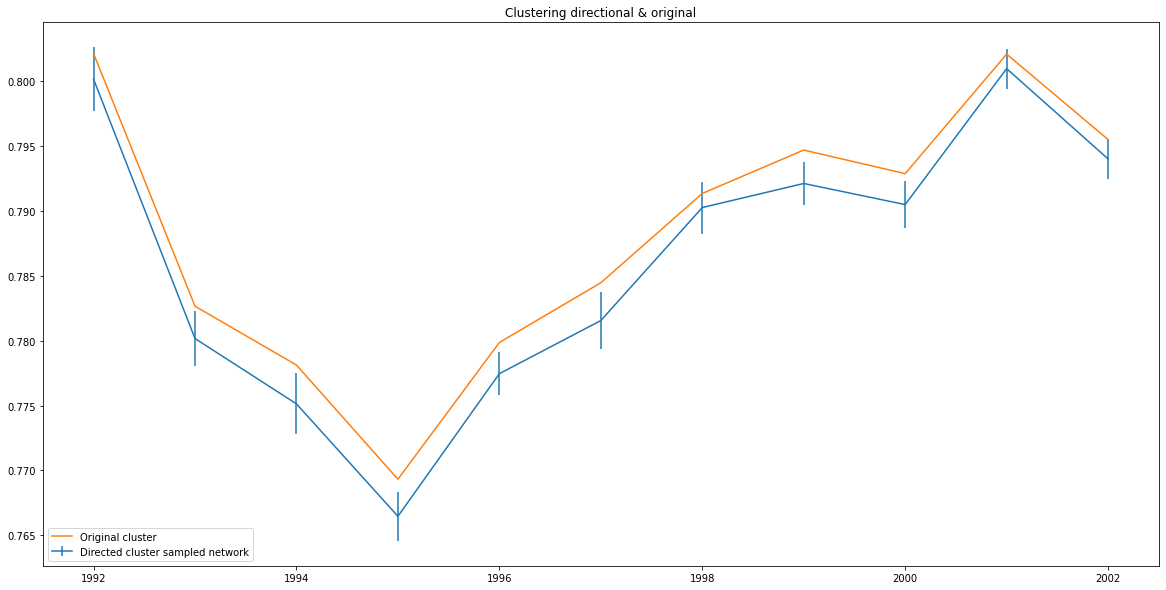

In [9]:
plt.figure(3, figsize=(20,10)) 
plt.title("Clustering directional & original")
#plt.errorbar(years, sampl_clust_undir, std_undirected_clust, label="Undirected cluster sampled network")
#plt.errorbar(years, sampl_clust_dir, std_directed_clust, label="Directed cluster sampled network")
plt.errorbar(years, sampl_clust_dir, x_std_dir_clust, label="Directed cluster sampled network")
plt.plot(years, orig_clust, label="Original cluster")
plt.legend()

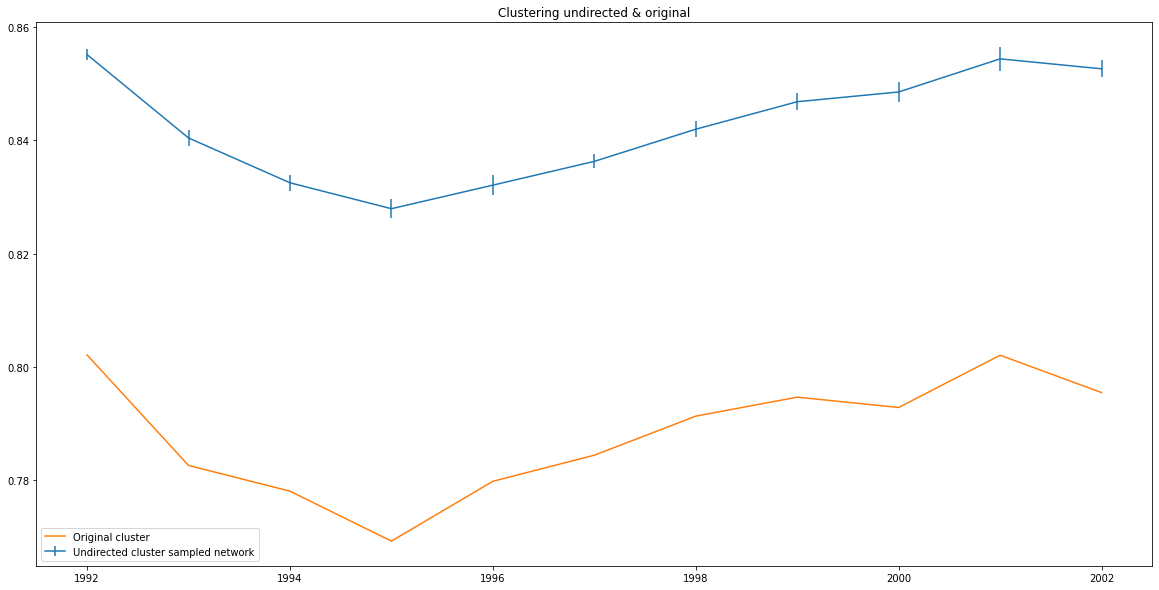

In [10]:
# Questionsable ??
plt.figure(3, figsize=(20,10)) 
plt.title("Clustering undirected & original")
#plt.errorbar(years, sampl_clust_undir, std_undirected_clust, label="Undirected cluster sampled network")
plt.errorbar(years, sampl_clust_undir, x_std_undir_clust, label="Undirected cluster sampled network")
plt.plot(years, orig_clust, label="Original cluster")
plt.legend()

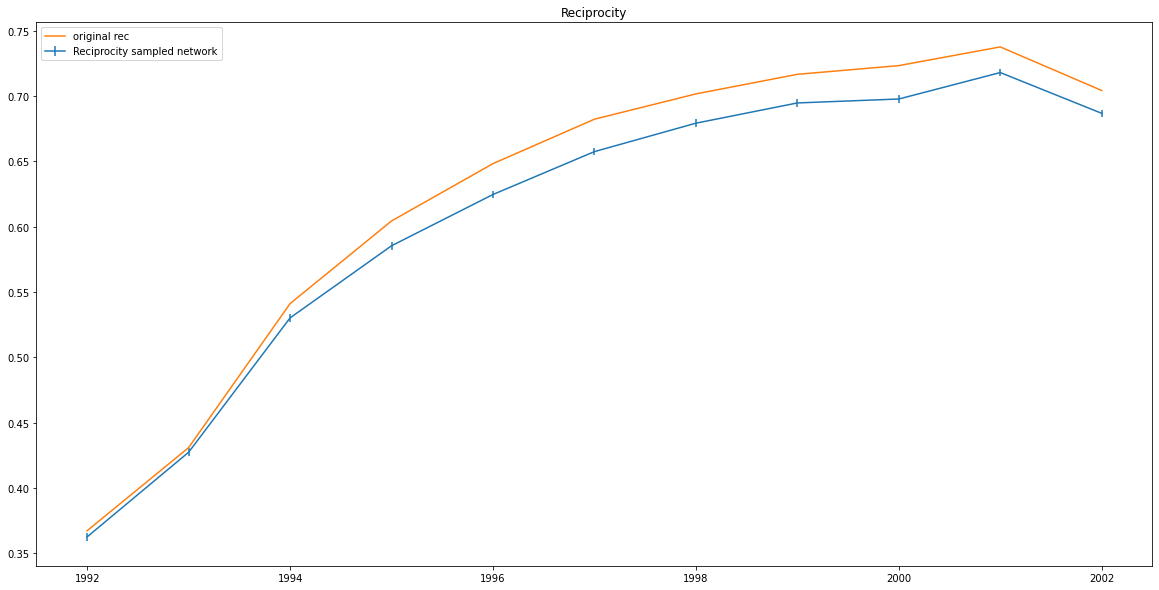

In [11]:
plt.figure(3, figsize=(20,10)) 
plt.title("Reciprocity")
#plt.errorbar(years, sampl_rec, std_directed_rec, label="Reciprocity sampled network")
plt.errorbar(years, sampl_rec, x_std_dir_rec, label="Reciprocity sampled network")
plt.plot(years, orig_rec, label="original rec")
plt.legend()

# A06.2 - Weighted ERGMs
Task: Repeat the analysis of point 1 with weighted networks
+ measure strength assortativity coefficient on the data
+ fit the Undirected Enhanced CM and Directed Enhanced CM
using the CReMa method
+ sample 30 networks from the obtained distributions and measure strength assortativity. Calculate average and std err
+ plot strength assortativity as a function of time, comparing the real value with the average and error bars from samples
+ directed: plot all pairs of assortativity (in-in, in-out, out-out)

In [12]:
orig_clust, orig_rec = [], []
orig_clust_undir = []

for k,v in graphs.items():
    c, r, std = [], [], []
    g = v
    orig_clust.append(nx.average_clustering(g))
    orig_rec.append(nx.overall_reciprocity(g))             
    

    adj_weigh = matrix_generator.random_weighted_matrix_generator_uniform_custom_density(n=30,
                                                                                     p=0.2,
                                                                                     sym=True,
                                                                                     sup_ext=30,
                                                                                     intweights=True)
    
    # directed
    adj_g = nx.to_numpy_array(g)
    dg = DirectedGraph(adj_g)
    dg.solve_tool(model="crema", method="newton", initial_guess="random", adjacency="dcm_exp", method_adjacency="newton")
    dg.ensemble_sampler(30, cpu_n=1, output_dir=f"samples/{k}/directed/") #30

    # undirected
    ug_bin = g.to_undirected()
    adj_undir = nx.to_numpy_array(ug_bin)
    ug = UndirectedGraph(adj_undir)
    orig_rec.append(nx.overall_reciprocity(g))             #ka öb das stimmt orig_rec wer sust leer 
    ug.solve_tool(model="crema",  method="newton", initial_guess="random", adjacency="cm_exp", method_adjacency="newton")
    ug.ensemble_sampler(30, cpu_n=1, output_dir=f"samples/{k}/undirected/") #30

/usr/local/lib/python3.7/dist-packages/numba/core/utils.py:613: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  category=NumbaExperimentalFeatureWarning)
/usr/local/lib/python3.7/dist-packages/NEMtropy/models_functions.py:4515: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  step_fun = args[0]
/usr/local/lib/python3.7/dist-packages/NEMtropy/models_functions.py:4516: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  arg_step_fun = args[1]
/usr/local/lib/python3.7/dist-packages/numba/core/utils.py:613: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  category=NumbaExperimentalFeatureWarning)



solution error = 342054444373.6123


/usr/local/lib/python3.7/dist-packages/numba/core/utils.py:613: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  category=NumbaExperimentalFeatureWarning)
/usr/local/lib/python3.7/dist-packages/numba/core/utils.py:613: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  category=NumbaExperimentalFeatureWarning)
/usr/local/lib/python3.7/dist-packages/NEMtropy/models_functions.py:1554: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  step_fun = args[0]
/usr/local/lib/python3.7/dist-packages/NEMtropy/models_functions.py:1555: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  arg_step_fun = args[1]
/usr/local/lib/python3.7/dist-packages/numba/core/utils.py:613: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  category=NumbaExperimentalFeatureWarning)



solution error = 350719040080.6791


/usr/local/lib/python3.7/dist-packages/numba/core/utils.py:613: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  category=NumbaExperimentalFeatureWarning)



solution error = 361183953936.7328

solution error = 390436313605.8929

solution error = 406546282601.87695

solution error = 327464382819.0255

solution error = 451961251428.5667

solution error = 476896889195.14154

solution error = 471466026654.0812

solution error = 480893960726.2471

solution error = 505525329948.9342

solution error = 629275425773.365

solution error = 537425567629.38403

solution error = 514851606792.0497

solution error = 560811723907.1188

solution error = 491436237813.4327

solution error = 591465719041.5447

solution error = 1139900377582.1821

solution error = 585802892634.0658

solution error = 510556946006.1504

solution error = 592133716936.6461

solution error = 506384129791.0763


In [13]:
sampl_assort_dir, sampl_assort_undir, sampl_rec = [], [], []
std_undirected_assort, std_directed_assort = [], []
assort_dir, assort_undir = [], []
out_out_model, in_out_model, in_in_model, in_in, out_out, out_in, in_out = [],[],[],[],[],[],[]
i_i, o_o,i_o,o_i = [],[],[],[]
real_vals = []
for i in years:
    assort = []
    clust = []

    for j in range(30):
        edgelist_ens = np.loadtxt(f"samples/{i}/undirected/{j}.txt")
        net = nx.Graph() # changed to graph alone
        net.add_weighted_edges_from(edgelist_ens)
        assort.append(degree_pearson_correlation_coefficient(net, weight="weight"))
        warnings.filterwarnings("ignore")

    # std
    std_undirected_assort.append(np.std(assort)) 
    #std_undirected_assort.append(np.std(sampl_assort_undir)) # 14 nov
    assort_undir.append(assort)
    
    assort2 = []
    std = []
    in_in_nested, out_out_nested, in_out_nested,  = [], [], []

    for j in range(30):
        edgelist_ens = np.loadtxt(f"samples/{i}/directed/{j}.txt")
        net = nx.DiGraph()
        #net.add_weighted_edges_from(edgelist_ens)
        net.add_weighted_edges_from(edgelist_ens)

        in_in_nested.append(degree_pearson_correlation_coefficient(net, "in", "in", weight="weight"))
        in_out_nested.append(degree_pearson_correlation_coefficient(net, "in", "out", weight="weight"))
        out_out_nested.append(degree_pearson_correlation_coefficient(net, "out", "out", weight="weight"))
        
        #net.add_edges_from(ens_adj)
        assort2.append(degree_pearson_correlation_coefficient(net, weight="weight"))


    in_in.append(degree_pearson_correlation_coefficient(graphs[i], "in", "in", weight="weight"))
    in_out.append(degree_pearson_correlation_coefficient(graphs[i], "in", "out", weight="weight"))
    out_out.append(degree_pearson_correlation_coefficient(graphs[i], "out", "out", weight="weight"))
    
    in_in_model.append(np.mean(in_in_nested))
    in_out_model.append(np.mean(in_out_nested))
    out_out_model.append(np.mean(out_out_nested))
    assort_dir.append(assort2)
    sampl_assort_dir.append(np.mean(assort2))
    sampl_assort_undir.append(np.mean(assort))
    i_i.append(np.mean(in_in))
    o_o.append(np.mean(out_out))
    i_o.append(np.mean(in_out))

    real_vals.append(degree_pearson_correlation_coefficient(graphs[i], weight="weight"))
    
    #std
    # std_directed_assort.append(np.std(sampl_assort_undir)) # 14. nov
    std_directed_assort.append(np.std(assort2)) 



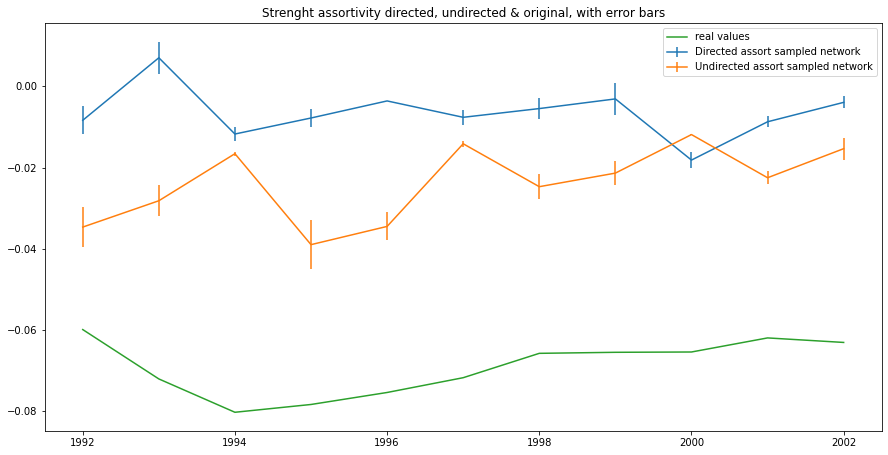

In [14]:
plt.figure(3, figsize=(15,7.5)) 
plt.title("Strenght assortivity directed, undirected & original, with error bars")
#plt.errorbar(years, sampl_clust_undir, std_undirected_clust, label="Undirected cluster sampled network")

new_assort_dir=[np.mean(x) for x in assort_dir]
new_assort_undir=[np.mean(x) for x in assort_undir]
plt.errorbar(years, new_assort_dir, std_directed_assort, label="Directed assort sampled network")
plt.errorbar(years, new_assort_undir, std_undirected_assort, label="Undirected assort sampled network")

#plt.plot(years, new_assort_dir, label="dir. assort")
#plt.plot(years, new_assort_undir, label="undir. assort")

plt.plot(years, real_vals, label="real values")

plt.legend()

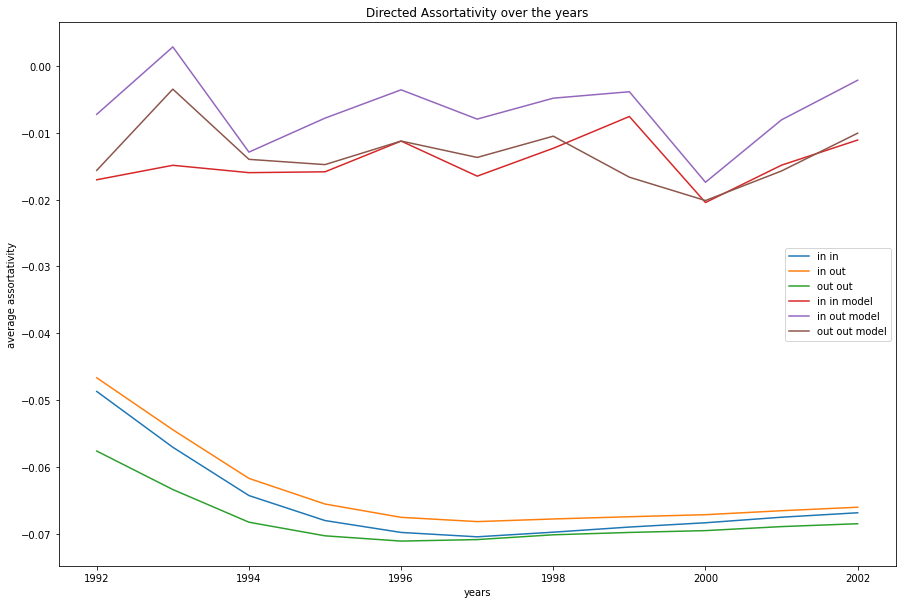

In [18]:
plt.figure(3, figsize=(15,10)) 
plt.plot(years, i_i , label="in in")
plt.plot(years,i_o,label= "in out")
plt.plot(years,o_o,label= "out out")
plt.plot(years,in_in_model,label="in in model")
plt.plot(years,in_out_model,label= "in out model")
plt.plot(years,out_out_model,label= "out out model")
plt.xlabel("years")
plt.ylabel("average assortativity")
plt.title("Directed Assortativity over the years")
plt.legend()
plt.show()

# A06.3 - Drawing conclusions
Task: write a short paragraph to draw conclusions about the structure of the World Trade Web based on the ERGM inferential approach
You should include at least the following points:
+ Comment on the interpretation of the clustering and reciprocity coefficients found in the original data
+ Comment on the interpretation of strength assortativity for this dataset
+ Comment on the conclusions you can draw via the inference of the UBCM, DBCM and DECM models

## clustering and reciprocity coefficients
+ The clustering coefficient of WTW stayed practically the same for the last 10 years at around 0.8. This might come down to loyality & trust between the trading partners. Obviously it's not always on 0.8 but stays pretty constant regarding the timeframe of 10 years. The Reciprocity increases drastically over the time (not in 2002 where it sunk a little.). This shows that those trades might have formed strong bonds between the trading partners.

-----------

## strength assortativity
+ In the dataset the strength assortativity is pretty low. This means poweful nodes in terms of trades is not likely to trade with low degree nodes in the network. For the real value we have marginal negative values, which may indicate the there are slightly more powerful nodes. This could mean that these nodes represent important trading countries in the region. The DECM and UECM behave similarly around the point 0.0 and slighty under, with a slow decrease over time.

-----------
## inference of the UBCM, DBCM and DECM models
+ DBCM models are better at predicting the clustering coefficient then UBCM.
Both UECM and DECM models predict a strength assortativity which is too high compared to the original WTW network.